In [2]:
import pickle

#### 1. Data

In [14]:
with open('Chilbolton_rel11_1min.pkl', 'rb') as f:
    observations = pickle.load(f)


In [15]:
observations

,Measurements
0,0.111857
1,0.109991
2,0.111300
3,0.112508
4,0.110222
...,...
11125,0.115819
11126,0.116849
11127,0.116158
11128,0.116061


In [23]:
with open('Chilbolton_rel11_1min_windfield.pkl', 'rb') as f:
    wind_field = pickle.load(f)


In [24]:
wind_field

,Average Speed,Average Direction
0,4.053931,62.534761
1,4.120709,37.971015
2,4.083932,44.156240
3,4.111633,53.661221
4,3.139466,43.533645
5,2.604967,27.863728
6,3.098856,38.244086
7,2.979681,36.161627
8,2.847921,44.501180
9,3.116153,51.139365


#### 2. Reflectors on the 80 x 110 m area of Chilbolton

In [11]:
line_of_sight_location = [35,10,1.6]

reflectors_location = {
    "reflector_1": [46.43965, 42.96129, 1.6],
    "reflector_2": [44.80926, 74.10383, 1.6],
    "reflector_3": [35.63756, 54.54544, 1.6],
    "reflector_4": [35.0, 108.0, 1.6],
    "reflector_5": [22.14318, 92.0083, 1.6],
    "reflector_6": [20.68626, 66.52586, 1.6],
    "reflector_7": [23.42495, 41.68171, 1.6],
}

In [13]:
number_of_point_sensors = {
    "reflector_1": 18,
    "reflector_2": 33,
    "reflector_3": 22,
    "reflector_4": 49,
    "reflector_5": 42,
    "reflector_6": 29,
    "reflector_7": 17,
}

#### 3. Point sensors to replace reflectors line-of-sight

In [12]:
def get_equally_spaced_points(point1, point2, num_points):
    # Calculate the step size for each dimension
    step_size = [(p2 - p1) / (num_points - 1) for p1, p2 in zip(point1, point2)]

    # Calculate the coordinates of the equally spaced points
    points = [[p1 + i * step for p1, step in zip(point1, step_size)] for i in range(num_points)]

    return points

In [19]:
point_sensors_1_location = get_equally_spaced_points(line_of_sight_location, reflectors_location["reflector_1"], number_of_point_sensors["reflector_1"])
point_sensors_2_location = get_equally_spaced_points(line_of_sight_location, reflectors_location["reflector_2"], number_of_point_sensors["reflector_2"])
point_sensors_3_location = get_equally_spaced_points(line_of_sight_location, reflectors_location["reflector_3"], number_of_point_sensors["reflector_3"])
point_sensors_4_location = get_equally_spaced_points(line_of_sight_location, reflectors_location["reflector_4"], number_of_point_sensors["reflector_4"])
point_sensors_5_location = get_equally_spaced_points(line_of_sight_location, reflectors_location["reflector_5"], number_of_point_sensors["reflector_5"])
point_sensors_6_location = get_equally_spaced_points(line_of_sight_location, reflectors_location["reflector_6"], number_of_point_sensors["reflector_6"])
point_sensors_7_location = get_equally_spaced_points(line_of_sight_location, reflectors_location["reflector_7"], number_of_point_sensors["reflector_7"])

print(point_sensors_7_location)

[[35.0, 10.0, 1.6], [34.276559375, 11.980106875, 1.6], [33.55311875, 13.960213750000001, 1.6], [32.829678125, 15.940320625, 1.6], [32.1062375, 17.920427500000002, 1.6], [31.382796875, 19.900534375, 1.6], [30.659356250000002, 21.88064125, 1.6], [29.935915625, 23.860748125, 1.6], [29.212474999999998, 25.840855, 1.6], [28.489034375, 27.820961875000002, 1.6], [27.76559375, 29.801068750000002, 1.6], [27.042153125, 31.781175625000003, 1.6], [26.3187125, 33.7612825, 1.6], [25.595271875, 35.741389375, 1.6], [24.87183125, 37.72149625, 1.6], [24.148390624999998, 39.701603125000005, 1.6], [23.42495, 41.68171, 1.6]]


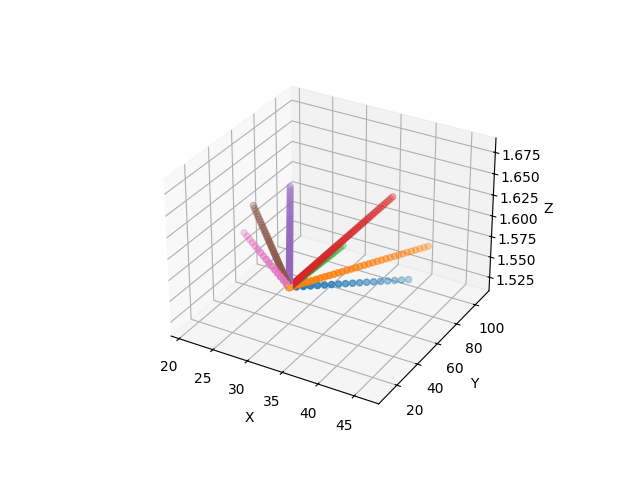

In [22]:
# for creating a responsive plot
%matplotlib widget
import matplotlib.pyplot as plt


# Create a new figure
fig = plt.figure()

# Create a 3D subplot

ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates
x_coords_1 = [location[0] for location in point_sensors_1_location]
y_coords_1 = [location[1] for location in point_sensors_1_location]
z_coords_1 = [location[2] for location in point_sensors_1_location]

x_coords_2 = [location[0] for location in point_sensors_2_location]
y_coords_2 = [location[1] for location in point_sensors_2_location]
z_coords_2 = [location[2] for location in point_sensors_2_location]

x_coords_3 = [location[0] for location in point_sensors_3_location]
y_coords_3 = [location[1] for location in point_sensors_3_location]
z_coords_3 = [location[2] for location in point_sensors_3_location]

x_coords_4 = [location[0] for location in point_sensors_4_location]
y_coords_4 = [location[1] for location in point_sensors_4_location]
z_coords_4 = [location[2] for location in point_sensors_4_location]

x_coords_5 = [location[0] for location in point_sensors_5_location]
y_coords_5 = [location[1] for location in point_sensors_5_location]
z_coords_5 = [location[2] for location in point_sensors_5_location]

x_coords_6 = [location[0] for location in point_sensors_6_location]
y_coords_6 = [location[1] for location in point_sensors_6_location]
z_coords_6 = [location[2] for location in point_sensors_6_location]

x_coords_7 = [location[0] for location in point_sensors_7_location]
y_coords_7 = [location[1] for location in point_sensors_7_location]
z_coords_7 = [location[2] for location in point_sensors_7_location]


# Plot the sensor locations
ax.scatter(x_coords_1, y_coords_1, z_coords_1)
ax.scatter(x_coords_2, y_coords_2, z_coords_2)
ax.scatter(x_coords_3, y_coords_3, z_coords_3)
ax.scatter(x_coords_4, y_coords_4, z_coords_4)
ax.scatter(x_coords_5, y_coords_5, z_coords_5)
ax.scatter(x_coords_6, y_coords_6, z_coords_6)
ax.scatter(x_coords_7, y_coords_7, z_coords_7)

extra_point = (line_of_sight_location[0], line_of_sight_location[1], line_of_sight_location[2])
ax.scatter(*extra_point, color='orange', marker='x')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()
%matplotlib inline

#### 4. Loading  average wind field